In [1]:
# Import Dependencies
import numpy as np
from fashion_mnist import Fashion_MNIST
import tensorflow as tf
from tensorflow import estimator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Data
print('\nLoading Fashion MNIST Data...')
data = Fashion_MNIST('./dataset/fashion_mnist/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Fashion MNIST Data...

Loading Training Data...


In [3]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


In [4]:
# Make sure dataset is balanced
len(train_img), len(train_labels)

(60000, 60000)

In [5]:
len(test_img), len(test_labels)

(10000, 10000)

In [6]:
# Create a list of what each label means
label_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [7]:
# Plot a random image
n = np.random.randint(0,60000,1)
print(n)

[33420]


(-0.5, 27.5, 27.5, -0.5)

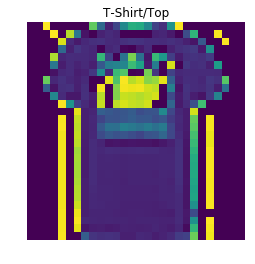

In [8]:
img = (np.reshape(train_img[n], (28, 28)) * 255).astype(np.uint8)
plt.imshow(img)
plt.title(label_names[train_labels[n[0]]])
plt.axis('off')

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_img, train_labels, test_size=0.2, random_state=101)

In [11]:
len(X_train), len(y_train)

(48000, 48000)

In [12]:
len(X_test), len(y_test)

(12000, 12000)

In [13]:
# Make Feature Columns
feat_cols = [tf.feature_column.numeric_column('X', shape=[28, 28])]

In [14]:
print(feat_cols)

[_NumericColumn(key='X', shape=(28, 28), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [15]:
linear_model = estimator.LinearClassifier(feature_columns=feat_cols, n_classes=10, optimizer=tf.train.AdamOptimizer(learning_rate=1e-4), model_dir='./tmp/Linear_fashion_mnist_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_model_dir': './tmp/Linear_fashion_mnist_model', '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028F3F035C50>, '_num_ps_replicas': 0, '_master': '', '_log_step_count_steps': 100, '_save_summary_steps': 100, '_service': None, '_task_type': 'worker', '_task_id': 0, '_tf_random_seed': None, '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000}


In [16]:
input_fn = estimator.inputs.numpy_input_fn(x={'X':X_train}, y=y_train.astype(np.int32), shuffle=True, batch_size=50, num_epochs=5)

In [17]:
linear_model.train(input_fn=input_fn, steps=200000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./tmp/Linear_fashion_mnist_model\model.ckpt.
INFO:tensorflow:step = 1, loss = 115.129
INFO:tensorflow:global_step/sec: 226.793
INFO:tensorflow:step = 101, loss = 44.919 (0.443 sec)
INFO:tensorflow:global_step/sec: 268.926
INFO:tensorflow:step = 201, loss = 47.7047 (0.370 sec)
INFO:tensorflow:global_step/sec: 280.611
INFO:tensorflow:step = 301, loss = 41.6239 (0.355 sec)
INFO:tensorflow:global_step/sec: 279.264
INFO:tensorflow:step = 401, loss = 17.4619 (0.359 sec)
INFO:tensorflow:global_step/sec: 325.503
INFO:tensorflow:step = 501, loss = 27.7584 (0.306 sec)
INFO:tensorflow:global_step/sec: 367.135
INFO:tensorflow:step = 601, loss = 25.8591 (0.272 sec)
INFO:tensorflow:global_step/sec: 387.783
INFO:tensorflow:step = 701, loss = 39.0226 (0.258 sec)
INFO:tensorflow:global_step/sec: 366.22
INFO:tensorflow:step = 801, loss = 48.9829 (0.273 sec)
INFO:tensorflow:global_step/sec: 377.999
INFO:tensorflow:s

In [18]:
eval_fn = estimator.inputs.numpy_input_fn(x={'X':X_test}, y=y_test.astype(np.int32), num_epochs=1, shuffle=False)

In [19]:
validation_accuracy_score = linear_model.evaluate(input_fn=eval_fn, steps=20)
print('Validation Report: ',validation_accuracy_score)

INFO:tensorflow:Starting evaluation at 2018-02-26-20:24:01
INFO:tensorflow:Restoring parameters from ./tmp/Linear_fashion_mnist_model\model.ckpt-4800
INFO:tensorflow:Evaluation [1/20]
INFO:tensorflow:Evaluation [2/20]
INFO:tensorflow:Evaluation [3/20]
INFO:tensorflow:Evaluation [4/20]
INFO:tensorflow:Evaluation [5/20]
INFO:tensorflow:Evaluation [6/20]
INFO:tensorflow:Evaluation [7/20]
INFO:tensorflow:Evaluation [8/20]
INFO:tensorflow:Evaluation [9/20]
INFO:tensorflow:Evaluation [10/20]
INFO:tensorflow:Evaluation [11/20]
INFO:tensorflow:Evaluation [12/20]
INFO:tensorflow:Evaluation [13/20]
INFO:tensorflow:Evaluation [14/20]
INFO:tensorflow:Evaluation [15/20]
INFO:tensorflow:Evaluation [16/20]
INFO:tensorflow:Evaluation [17/20]
INFO:tensorflow:Evaluation [18/20]
INFO:tensorflow:Evaluation [19/20]
INFO:tensorflow:Evaluation [20/20]
INFO:tensorflow:Finished evaluation at 2018-02-26-20:24:01
INFO:tensorflow:Saving dict for global step 4800: accuracy = 0.814062, average_loss = 0.797966, glob

In [20]:
# Predictions
final_pred_fn = estimator.inputs.numpy_input_fn(x={'X':test_img}, num_epochs=1, shuffle=False)
pred = list(linear_model.predict(input_fn=final_pred_fn))

INFO:tensorflow:Restoring parameters from ./tmp/Linear_fashion_mnist_model\model.ckpt-4800


In [21]:
pred

[{'class_ids': array([9], dtype=int64),
  'classes': array([b'9'], dtype=object),
  'logits': array([-15.77508736, -45.23558807,  -3.75209403, -11.86170673,
         -11.00303555,  14.58185482,  -4.33521032,  11.94181538,
           6.67348671,  16.53024864], dtype=float32),
  'probabilities': array([  8.09553433e-15,   1.29930716e-27,   1.34823352e-09,
           4.05326272e-13,   9.56580952e-13,   1.23622641e-01,
           7.52524765e-10,   8.82152095e-03,   4.54503643e-05,
           8.67510438e-01], dtype=float32)},
 {'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object),
  'logits': array([   0.95021111,  -44.48378754,   18.95829201,   -9.02753639,
           11.26197433,  -73.24584961,   12.81826401, -125.28109741,
           -2.00121164, -116.13527679], dtype=float32),
  'probabilities': array([  1.50680783e-08,   2.79462787e-28,   9.97397423e-01,
           6.99483386e-13,   4.53314831e-04,   0.00000000e+00,
           2.14925501e-03,   0.00000000e+00,

In [22]:
predictions = [p['class_ids'][0] for p in pred]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(classification_report(test_labels, predictions))

             precision    recall  f1-score   support

          0       0.88      0.63      0.73      1000
          1       0.99      0.92      0.95      1000
          2       0.71      0.63      0.67      1000
          3       0.84      0.83      0.83      1000
          4       0.64      0.82      0.72      1000
          5       0.96      0.89      0.92      1000
          6       0.54      0.60      0.57      1000
          7       0.86      0.97      0.91      1000
          8       0.90      0.95      0.92      1000
          9       0.96      0.91      0.93      1000

avg / total       0.83      0.82      0.82     10000



In [25]:
print(confusion_matrix(test_labels, predictions))

[[633   3  30  56  19   1 236   0  22   0]
 [  2 921  12  35  22   0   5   0   3   0]
 [  4   0 632  11 211   1 129   0  12   0]
 [ 14   6  24 826  59   1  51   0  19   0]
 [  0   0  69  23 822   0  73   0  13   0]
 [  0   0   0   1   0 887   0  78   6  28]
 [ 67   1 116  29 156   0 597   0  34   0]
 [  0   0   0   0   0  15   0 974   0  11]
 [  3   0   8   4   5   4  14   8 954   0]
 [  0   0   0   0   0  15   1  77   1 906]]


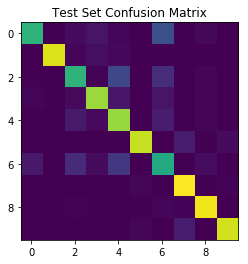

In [26]:
plt.imshow(confusion_matrix(test_labels, predictions))
plt.title('Test Set Confusion Matrix')